In [1]:
from astropy.io import fits
from astropy.table import Table
import numpy as np
import matplotlib.pylab as plt 
import matplotlib.lines as mlines
from matplotlib.legend import Legend
from pythonds.basic.stack import Stack
from math import *
from sklearn.neighbors import KDTree
from lrg_plot_functions import *
from lrg_sum_functions import *
from cosmo_Calc import *
from divideByTwo import *
from read_data import *
from nearNeighbors import *
from scipy import stats
from astropy import stats
import healpy as hp
from localBKG_and_interlopersHEALPix import *
# import healpy as hpy
from makeCutoutTableFunc import *
from plotHistogramProjections3D import *
from read_bricks import *
from mpl_toolkits.axes_grid1 import make_axes_locatable
import random

In [2]:
# read in data

data_ra = np.load('/Users/mtownsend/Documents/LRG_Data/ra_total.npz')
ra_total = data_ra['ra']
# print(ra_total.shape)

# print('----')

data_dec = np.load('/Users/mtownsend/Documents/LRG_Data/dec_total.npz')
dec_total = data_dec['dec']
# print(dec_total.shape)

# print('----')

data_gmag = np.load('/Users/mtownsend/Documents/LRG_Data/gmag_total.npz')
gmag_total = data_gmag['gmag']
# print(gmag_total.shape)

# print('----')

data_rmag = np.load('/Users/mtownsend/Documents/LRG_Data/rmag_total.npz')
rmag_total = data_rmag['rmag']
# print(rmag_total.shape)

# print('----')

data_zmag = np.load('/Users/mtownsend/Documents/LRG_Data/zmag_total.npz')
zmag_total = data_zmag['zmag']
# print(zmag_total.shape)

# print('----')

data_grcolor = np.load('/Users/mtownsend/Documents/LRG_Data/grcolor_total.npz')
grcolor_total = data_grcolor['grcolor']
# print(grcolor_total.shape)

# print('----')

data_rzcolor = np.load('/Users/mtownsend/Documents/LRG_Data/rzcolor_total.npz')
rzcolor_total = data_rzcolor['rzcolor']
# print(rzcolor_total.shape)


In [3]:
# read in indices assigned as random pointings

data_index_lowz = np.load('/Users/mtownsend/Documents/LRG_Data/index_lowz.npz')
index_lowz = data_index_lowz['index_lowz']
print(index_lowz)

data_index_midz1 = np.load('/Users/mtownsend/Documents/LRG_Data/index_midz1.npz')
index_midz1 = data_index_midz1['index_midz1']
print(index_midz1)

data_index_midz2 = np.load('/Users/mtownsend/Documents/LRG_Data/index_midz2.npz')
index_midz2 = data_index_midz2['index_midz2']
print(index_midz2)

data_index_midz3 = np.load('/Users/mtownsend/Documents/LRG_Data/index_midz3.npz')
index_midz3 = data_index_midz3['index_midz3']
print(index_midz3)

data_index_highz = np.load('/Users/mtownsend/Documents/LRG_Data/index_highz.npz')
index_highz = data_index_highz['index_highz']
print(index_highz)

[ 65197 426408 117669 ... 159522 449206  94330]
[234297 291919 433679 ...  83417 246046 428425]
[256190 464126 182923 ... 376404 131772 299287]
[154348  83296  43124 ...  70194   4939 470802]
[218182 500265 239433 ... 241240 144182 167813]


In [4]:
# create arrays with random pointings and background

# make a random data set that I will treat as LRGs
random_raLRG = ra_total[index_lowz]
random_decLRG = dec_total[index_lowz]
random_gmagLRG = gmag_total[index_lowz]
random_rmagLRG = rmag_total[index_lowz]
random_zmagLRG = zmag_total[index_lowz]
random_grcolorLRG = grcolor_total[index_lowz]
random_rzcolorLRG = rzcolor_total[index_lowz]

# eliminate "LRGs" from background catalog
random_raBKG = np.delete(ra_total, index_lowz)
random_decBKG = np.delete(dec_total, index_lowz)
random_gmagBKG = np.delete(gmag_total, index_lowz)
random_rmagBKG = np.delete(rmag_total, index_lowz)
random_zmagBKG = np.delete(zmag_total, index_lowz)
random_grcolorBKG = np.delete(grcolor_total, index_lowz)
random_rzcolorBKG = np.delete(rzcolor_total, index_lowz)

# print(len(random_raLRG))
# print(len(random_raBKG))
# print(len(ra_total))
# print(len(random_raLRG) + len(random_raBKG))

ra_tot = np.concatenate([random_raLRG, random_raBKG])
dec_tot = np.concatenate([random_decLRG, random_decBKG])
gmag_tot = np.concatenate([random_gmagLRG, random_gmagBKG])
rmag_tot = np.concatenate([random_rmagLRG, random_rmagBKG])
zmag_tot = np.concatenate([random_zmagLRG, random_zmagBKG])
rzcolor_tot = np.concatenate([random_rzcolorLRG, random_rzcolorBKG])
grcolor_tot = np.concatenate([random_grcolorLRG, random_grcolorBKG])

# print(len(ra_tot))
# print(len(dec_tot))
# print(len(gmag_tot))
# print(len(rmag_tot))
# print(len(zmag_tot))
# print(len(rzcolor_tot))
# print(len(rzcolor_tot))

In [5]:
# each random pointing is assiged a redshift from the real distribution of LRG redshifts

data_random_z_low = np.load('/Users/mtownsend/Documents/LRG_Data/random_z_low.npz')
random_z_low = data_random_z_low['random_z_low']

## Run analysis to find null result

In [6]:
DTT_Gyr, age_Gyr, zage_Gyr, DCMR_Mpc, DCMR_Gyr, DA_Mpc, DA_Gyr, kpc_DA, DL_Mpc, DL_Gyr, V_Gpc = cosmoCalcfunc(random_z_low)

print("end cosmoCalc")


end cosmoCalc


In [7]:
rz_edges = np.array([-1.8027077, -1.5527076721191406, -1.3027076721191406, -1.0527076721191406, -0.8027076721191406, -0.5527076721191406, -0.3027076721191406, -0.052707672119140625, 0.19729232788085938, 0.4472923278808594, 0.6972923278808594, 0.9472923278808594, 1.1972923278808594, 1.4472923278808594, 1.6972923278808594, 1.9472923278808594, 2.1972923278808594, 2.4472923278808594, 2.6972923278808594, 2.9472923278808594, 3.1972923278808594, 3.4472923278808594, 3.6972923278808594, 3.9472923278808594, 4.197292327880859, 4.447292327880859, 4.697292327880859, 4.947292327880859, 5.197292327880859, 5.447292327880859, 5.697292327880859, 5.947292327880859, 6.197292327880859, 6.447292327880859, 6.697292327880859, 6.947292327880859, 7.197292327880859, 7.447292327880859, 7.697292327880859, 7.947292327880859, 8.19729232788086, 8.44729232788086, 8.69729232788086, 8.94729232788086, 9.19729232788086, 9.44729232788086, 9.69729232788086, 9.94729232788086, 10.19729232788086, 10.44729232788086])
gr_edges = np.array([-6.5846786, -6.234678649902344, -5.8846786499023445, -5.534678649902345, -5.184678649902345, -4.8346786499023455, -4.484678649902346, -4.134678649902346, -3.784678649902346, -3.434678649902346, -3.084678649902346, -2.734678649902346, -2.384678649902346, -2.0346786499023457, -1.6846786499023456, -1.3346786499023455, -0.9846786499023455, -0.6346786499023456, -0.2846786499023456, 0.06532135009765438, 0.41532135009765436, 0.7653213500976543, 1.1153213500976542, 1.4653213500976543, 1.8153213500976544, 2.1653213500976545, 2.5153213500976546, 2.8653213500976547, 3.2153213500976547, 3.565321350097655, 3.915321350097655, 4.265321350097655, 4.615321350097655, 4.965321350097654, 5.315321350097654, 5.665321350097654, 6.015321350097653, 6.365321350097653, 6.7153213500976525, 7.065321350097652, 7.415321350097652, 7.7653213500976515, 8.115321350097652, 8.465321350097652, 8.815321350097651, 9.165321350097651, 9.51532135009765, 9.86532135009765, 10.21532135009765, 10.56532135009765])

zmaginit = 13.
zmagfin = 23.
interval = 0.2
zmag_num = (zmagfin-zmaginit)/interval
zmag_edges, step = np.linspace(zmaginit, zmagfin, num=int(zmag_num), retstep=True)
print(type(zmag_edges))


H1, nouse_edges = np.histogramdd((rzcolor_tot, grcolor_tot, zmag_tot), bins=(rz_edges, gr_edges, zmag_edges), density=False)


<class 'numpy.ndarray'>


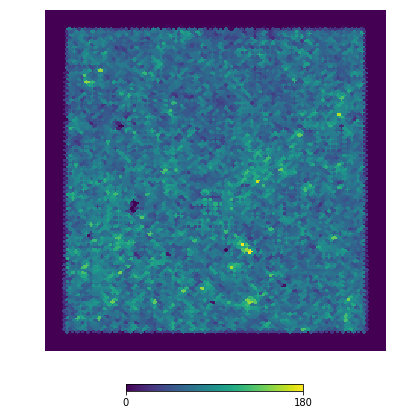

length phi:  519348


In [8]:
# Make HEALPix map using just RA/Dec; end up with a density plot

nside = 1024
npixel = hp.nside2npix(nside)

# Convert ra/dec into theta/phi
theta = []
phi = []

for i in range(len(ra_tot)):
    theta.append(np.radians(90. - dec_tot[i]))
    phi.append(np.radians(ra_tot[i]))
    
m = hp.ang2pix(nside, theta, phi)
map_ = np.bincount(m, minlength=npixel)
hp.gnomview(map_, xsize=225, rot=(-116.5, 9), flip='geo', cmap='viridis', notext=True, title="")
# plt.rcParams.update({'font.size':20})
# plt.savefig('/Users/mtownsend/Desktop/survey-density.jpg')
# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/HEALPix-survey-density-v2.pdf')
plt.show()

print('length phi: ', len(phi))

# Convert angles theta and phi to pixel numbers

pixnums = hp.ang2pix(nside, theta, phi, nest=True)

In [9]:
distance = 0.5 # must be in Mpc

# distance_kpc, near, gal_tree, dist, index, nn1 = nearNeighbor(distance, kpc_DA, random_raLRG, random_decLRG, random_raBKG, random_decBKG, random_zmagLRG, random_zmagBKG, random_rzcolorLRG, random_rzcolorBKG, random_grcolorLRG, random_grcolorBKG, nouse_edges)
distance_kpc, near, gal_tree, dist, index, nn1 = nearNeighbor(distance, kpc_DA, random_raLRG, random_decLRG, random_raBKG, random_decBKG, random_zmagLRG, random_zmagBKG, random_rzcolorLRG, random_rzcolorBKG, random_grcolorLRG, random_grcolorBKG, nouse_edges)

print('end nearNeighbor')


end nearNeighbor


In [10]:
# save near array

np.savez('/Users/mtownsend/Documents/LRG_Data/null_near_low.npz', near=near)
# data_model8 = np.load('/Users/mtownsend/Documents/LRG_Data/low_Nsat_model8_25.npz')
# low_Nsat25_model8 = data_model8['low_Nsat25_model8']

# save indices of near neighbors

np.savez('/Users/mtownsend/Documents/LRG_Data/near_index_null_low.npz', index=index)
null_near_index = np.load('/Users/mtownsend/Documents/LRG_Data/near_index_null_low.npz')
near_index = null_near_index['index']

In [11]:
inner_dist = 0.4 # in deg
outer_dist = 0.5 # in deg

Nbkg, indices, omega, localBKG = localBKG_and_interlopersHEALPix(nside, inner_dist, outer_dist, random_raLRG, random_decLRG, pixnums, zmag_tot, rzcolor_tot, grcolor_tot, nouse_edges, distance_kpc, kpc_DA)

omega = np.array(omega)

print("end bkg")


end bkg


In [12]:
# save near array

np.savez('/Users/mtownsend/Documents/LRG_Data/null_bkg_low.npz', Nbkg=Nbkg)
# data_model8 = np.load('/Users/mtownsend/Documents/LRG_Data/low_Nsat_model8_25.npz')
# low_Nsat25_model8 = data_model8['low_Nsat25_model8']


In [13]:
# calculate Nsat, and Nsat in bins of redshift

Nsat = np.array(near) - np.array(Nbkg)

# near in bins of redshift

near_arr = np.asarray(near)

near25 = near_arr[np.where((random_z_low >= 0.2) & (random_z_low < 0.25))]
near03 = near_arr[np.where((random_z_low >= 0.25) & (random_z_low < 0.3))]


# Nbkg in bins of redshift

Nbkg_arr = np.asarray(Nbkg)

Nbkg25 = Nbkg_arr[np.where((random_z_low >= 0.2) & (random_z_low < 0.25))]
Nbkg03 = Nbkg_arr[np.where((random_z_low >= 0.25) & (random_z_low < 0.3))]


# Nsat in bins of redshift

Nsat25 = near25 - Nbkg25
Nsat03 = near03 - Nbkg03

print('end Nsat')


end Nsat


## Add models to near neighbors null result and calculate Nsat again

In [15]:
# read in mask and initialize function needed to add satellites to null result

data_zmag = np.load('/Users/mtownsend/Documents/LRG_Data/lowz_medzmag-2matrices.npz')
medzmag = data_zmag['medzmag_low']
print(medzmag.shape)
medzmag0 = medzmag[0]
medzmag1 = medzmag[1]


def adding_sats(medzmag, index, rzcolor_total, grcolor_total, zmag_total, rz_edges, gr_edges, lam):
    
    # index == index of sources found to be 500 kpc from LRG pointing
    # medzmag == array of zmags that correspond to luminosity limits for each cell of r-z and g-r color
    # rzcolor_total, grcolor_total, zmag_total == 1D arrays with colors and magnitude of all sources
    # rz_edges, gr_edges == edges of r-z vs g-r color space
    # lam == mean of poisson distribution from which the function draws the number of sources to be added
    
    import numpy as np
    
    rz = rzcolor_total[index]
    gr = grcolor_total[index]
    zmag = zmag_total[index]

    candidate_index = []

    # This loop finds the galaxies in color-color cells that meet the critera of median_zmag in those cells
    for i in range(len(rz_edges) - 1):
        for j in range(len(gr_edges) - 1):
            for m in range(len(rz)):
                if ((rz[m] >= rz_edges[i]) & (rz[m] <= rz_edges[i + 1]) & (gr[m] >= gr_edges[j]) & (gr[m] <= gr_edges[j + 1]) & (zmag[m] <= medzmag[i][j])):
                    candidate_index.append(m)
#     print('candidate index: ', candidate_index)
    # draw number of from gaussian
#      N = np.random.normal(loc=1., scale=1., size=1)
    N = np.random.poisson(lam=lam, size=1)
#     print(N)
    num = round(float(N))
#     print(num)
#     a = np.random.choice(candidate_index, size=int(num), replace=True)
    if (len(candidate_index) > 0.):
        a = np.random.choice(candidate_index, size=int(num), replace=True)
#         print(len(a))
        new_rz = np.concatenate((rz,rz[a]))
        new_gr = np.concatenate((gr,gr[a]))
        new_zmag = np.concatenate((zmag,zmag[a]))
    else:
        new_rz = rz
        new_gr = gr
        new_zmag = zmag
    
    return new_rz, new_gr, new_zmag, candidate_index

(2, 49, 49)


In [16]:
# bin near indices by redshift

low_nearindex25 = near_index[np.where((random_z_low >= 0.2) & (random_z_low < 0.25))]
low_nearindex03 = near_index[np.where((random_z_low >= 0.25) & (random_z_low < 0.3))]

print(len(low_nearindex25))
print(len(low_nearindex03))


2611
2389


In [17]:
# loop through random pointings to get models

new_rz25 = []
new_gr25 = []
new_zmag25 = []
new_index25 = []

for i in range(len(low_nearindex25)):
    temp_rz25, temp_gr25, temp_zmag25, temp_index25 = adding_sats(medzmag0, low_nearindex25[i], rzcolor_tot, grcolor_tot, zmag_tot, rz_edges, gr_edges, 8.)
#     print(i)
    new_rz25.append(temp_rz25)
    new_gr25.append(temp_gr25)
    new_zmag25.append(temp_zmag25)
    new_index25.append(temp_index25)
    
print('end 25')
    

new_rz03 = []
new_gr03 = []
new_zmag03 = []
new_index03 = []

for i in range(len(low_nearindex03)):
    temp_rz03, temp_gr03, temp_zmag03, temp_index03 = adding_sats(medzmag1, low_nearindex03[i], rzcolor_tot, grcolor_tot, zmag_tot, rz_edges, gr_edges, 8.)
#     print(i)
    new_rz03.append(temp_rz03)
    new_gr03.append(temp_gr03)
    new_zmag03.append(temp_zmag03)
    new_index03.append(temp_index03)

print('end 03')


end 25
end 03


In [18]:
# save new colors and magnitudes

np.savez('/Users/mtownsend/Documents/LRG_Data/low_grcolor_model8.npz', new_gr25=new_gr25, new_gr03=new_gr03)
# data_model8 = np.load('/Users/mtownsend/Documents/LRG_Data/low_Nsat_model8_25.npz')
# low_Nsat25_model8 = data_model8['low_Nsat25_model8']
np.savez('/Users/mtownsend/Documents/LRG_Data/low_rzcolor_model8.npz', new_rz25=new_rz25, new_rz03=new_rz03)

np.savez('/Users/mtownsend/Documents/LRG_Data/low_zmag_model8.npz', new_zmag25=new_zmag25, new_zmag03=new_zmag03)


In [19]:
# create new near neighbors arrays for each random pointing

# create new 3D histograms with new_rz, new_gr, and new_zmag
near25_model8 = []
for i in range(len(new_rz25)):
    if len(new_rz25[i]) == 0:
        hist3d = np.zeros((len(rz_edges) - 1, len(gr_edges) - 1, len(zmag_edges - 1)))
        near25_model8.append(hist3d)
    else:
        hist3d, edges_nouse = np.histogramdd((new_rz25[i], new_gr25[i], new_zmag25[i]), bins=(rz_edges, gr_edges, zmag_edges), density=False)
        near25_model8.append(hist3d)
        
print('end 25')


near03_model8 = []
for i in range(len(new_rz03)):
    if len(new_rz03[i]) == 0:
        hist3d = np.zeros((len(rz_edges) - 1, len(gr_edges) - 1, len(zmag_edges - 1)))
        near03_model8.append(hist3d)
    else:
        hist3d, edges_nouse = np.histogramdd((new_rz03[i], new_gr03[i], new_zmag03[i]), bins=(rz_edges, gr_edges, zmag_edges), density=False)
        near03_model8.append(hist3d)
        
print('end 03')

end 25
end 03


In [20]:
# save low bin model 8 near neighbor array

np.savez('/Users/mtownsend/Documents/LRG_Data/low_near_model8.npz', near25_model8=near25_model8, near03_model8=near03_model8)
# data_model8 = np.load('/Users/mtownsend/Documents/LRG_Data/low_Nsat_model8_25.npz')
# low_Nsat25_model8 = data_model8['low_Nsat25_model8']


print(np.asarray(near25_model8).shape)
print(np.asarray(near03_model8).shape)



(2611, 49, 49, 49)
(2389, 49, 49, 49)


In [21]:
# put Nbkg into redshift bins

Nbkg_arr = np.asarray(Nbkg)

low_Nbkg25 = Nbkg_arr[np.where((random_z_low >= 0.2) & (random_z_low < 0.25))]
low_Nbkg03 = Nbkg_arr[np.where((random_z_low >= 0.25) & (random_z_low < 0.3))]


print(low_Nbkg25.shape)
print(low_Nbkg03.shape)


(2611, 49, 49, 49)
(2389, 49, 49, 49)


In [22]:
# calculate Nsat for model 

low_Nsat25 = np.array(near25_model8) - low_Nbkg25
low_Nsat03 = np.array(near03_model8) - low_Nbkg03

print(low_Nsat25.shape)
print(low_Nsat03.shape)


(2611, 49, 49, 49)
(2389, 49, 49, 49)


## Plot and compare null Nsat with model Nsat

In [25]:
# mask Nsat and model Nsat

data_smatrix03 = np.load('/Users/mtownsend/Desktop/lowz_smatrix-2matrices.npz')
smatrix03 = data_smatrix03['smatrix_low']
print(smatrix03.shape)

masked_model8_Nsat25 = low_Nsat25 * smatrix03[0]
masked_og_Nsat25 = Nsat25 * smatrix03[0]

masked_model8_Nsat03 = low_Nsat03 * smatrix03[1]
masked_og_Nsat03 = Nsat03 * smatrix03[1]

(2, 49, 49, 49)


mean number of near neighbors is 0.12655590086667862
mean number of near neighbors is 4.377800634685139
median number of near neighbors is -0.06559341408163971
median number of near neighbors is 4.454873282765146


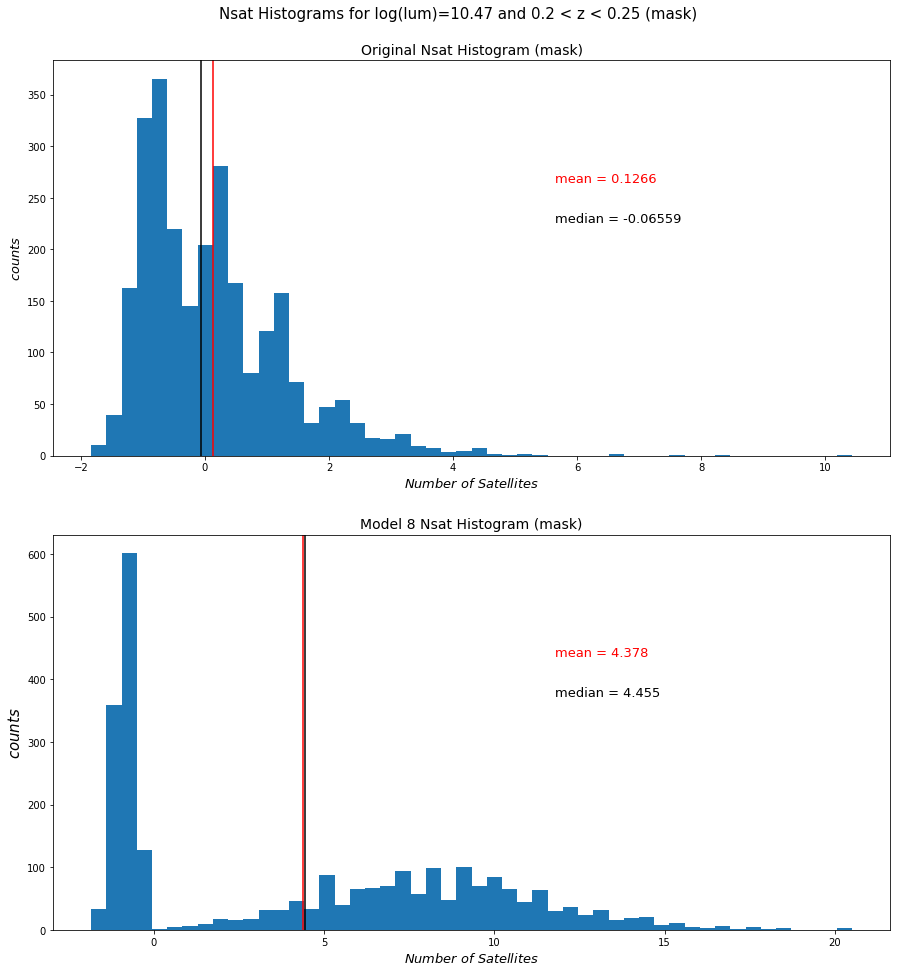

In [26]:
# plot Nsat25 and model Nsat25

og_sum25 = []
model8_sum25 = []
# Sum up number of near neighbors for every LRG
for i in range(len(masked_og_Nsat25)):
    og_sum25.append(np.sum(masked_og_Nsat25[i]))
    model8_sum25.append(np.sum(masked_model8_Nsat25[i]))

og_mean25 = np.mean(og_sum25)
print("mean number of near neighbors is", og_mean25)

model8_mean25 = np.mean(model8_sum25)
print("mean number of near neighbors is", model8_mean25)

og_median25 = np.median(og_sum25)
print("median number of near neighbors is", og_median25)

model8_median25 = np.median(model8_sum25)
print("median number of near neighbors is", model8_median25)

# mediannear = np.median(sumnear)
# print("median number of near neighbors is", mediannear)

# sdnear = np.std(sumnear)
# print("standard deviation of near neighbor is", sdnear)

# sterrNear = stats.sem(sumnear)
# print("standard error is", sterrNear)

# plt.hist(og_near, bins=100)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,15)) #, sharex=True)
fig.suptitle('Nsat Histograms for log(lum)=9.55 and 0.2 < z < 0.25 (mask)', fontsize=15)
fig.subplots_adjust(top=0.93)
ax1.hist(og_sum25, bins=50)
ax1.set_title('Original Nsat Histogram (mask)', fontsize=14)
ax1.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=13)
ax1.set_ylabel(r'$counts$', fontsize=13)
ax1.axvline(x=og_mean25, color='r')
ax1.axvline(x=og_median25, color='black')
ax1.text(0.6, 0.7, 'mean = {0:.4g}'.format(og_mean25), horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=13, color='r')
ax1.text(0.6, 0.6, 'median = {0:.4g}'.format(og_median25), horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=13)

ax2.hist(model8_sum25, bins=50)
ax2.set_title('Model 8 Nsat Histogram (mask)', fontsize=14)
ax2.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=13)
ax2.set_ylabel(r'$counts$', fontsize=15)
ax2.axvline(x=model8_mean25, color='r')
ax2.axvline(x=model8_median25, color='black')
ax2.text(0.6, 0.7, 'mean = {0:.4g}'.format(model8_mean25), horizontalalignment='left', verticalalignment='center', transform=ax2.transAxes, fontsize=13, color='r')
ax2.text(0.6, 0.6, 'median = {0:.4g}'.format(model8_median25), horizontalalignment='left', verticalalignment='center', transform=ax2.transAxes, fontsize=13)

# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/04Dec2020/low_Nsat_model8_comparison25-masked.pdf')

plt.show()